In [272]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

## PGの実装

In [301]:
class ProximalGradient:
    def __init__(self, dim=2, lam=0.01):
        # self.weight = np.zeros(dim)
        # self.weight = np.random.randn(dim)
        self.weight = np.array([3.0, -1.0])
        self.lr = 0.0   # 後で設定
        self.lam = lam
        self.weight_history = np.zeros(0)
        
    def proximal_operator(self, v):
        return self.soft_thresholding(v, self.lr * self.lam)

    def soft_thresholding(self, b, lam):
        x = np.zeros(b.shape[0])
        x[np.where(b >= lam)] = b[np.where(b >= lam)] - lam
        x[np.where(b <= -lam)] = b[np.where(b <= -lam)] + lam
        return x
        
    def train(self, mat, vec, epochs=10):
        self.weight_history = np.zeros((epochs, len(self.weight)))
        self.lr = (2 * np.max(np.linalg.eigvals(A)))**-1
        for epoch in range(epochs):
            self.weight_history[epoch] = self.weight
            self.weight = self.proximal_operator(
                self.weight - self.lr * self.grad(mat, vec),
            )

    def l1_norm(self):
        return np.linalg.norm(self.weight, np.inf)
            
    def predict(self, mat, vec):
        return np.dot((self.weight-vec), np.dot(A, (self.weight - vec))) \
            + self.lam * self.l1_norm()        
    
    def grad(self, mat, vec):
        return 2 * np.dot(A, (self.weight - vec))

In [302]:
def draw(data):
    x_axis = np.arange(epochs)
    plt.xlabel("iteration")
    plt.ylabel("w(t) - w")
    plt.plot(x_axis, data[:, 0], label="w_1")
    plt.plot(x_axis, data[:, 1], label="w_2")
    plt.yscale("log")
    plt.legend()
    plt.show()

## 問題設定

In [303]:
epochs = 50
A = np.array([[3, 0.5],
             [0.5, 1]])
mu = np.array([1, 2])

## λ = 2

In [304]:
pg = ProximalGradient(lam=2)
pg.train(A, mu, epochs=epochs)

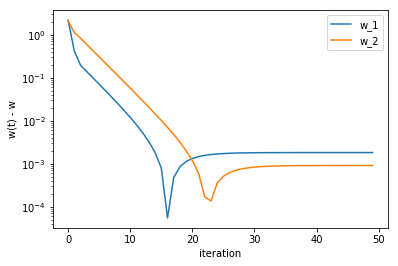

In [305]:
true_w = np.array([0.82, 1.09])
draw(np.abs(pg.weight_history - true_w))

## λ = 4

In [306]:
pg = ProximalGradient(lam=4)
pg.train(A, mu, epochs=epochs)

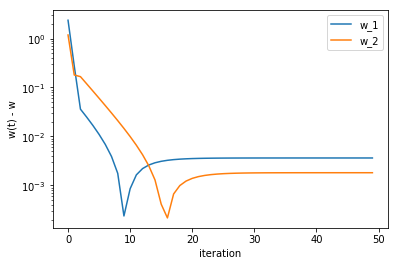

In [307]:
true_w = np.array([0.64, 0.18])
draw(np.abs(pg.weight_history - true_w))

## λ = 6

In [308]:
pg = ProximalGradient(lam=6)
pg.train(A, mu, epochs=epochs)

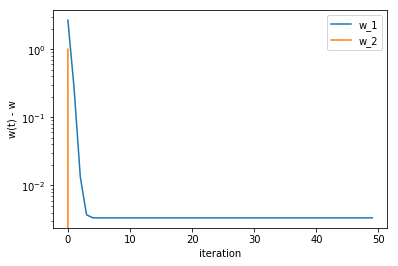

In [309]:
true_w = np.array([0.33, 0])
draw(np.abs(pg.weight_history - true_w))